In [1]:
import numpy as np
from scipy.spatial import Delaunay#, ConvexHull
import matplotlib.pyplot as plt
from copy import copy, deepcopy

In [2]:
class Delaunay_temp:
    def __init__(self,points,simplices):
        self.points = points
        self.simplices = simplices

## Define a hull
Define the shape on the negative side of Y axis

In [3]:
def creatHull(hull_bound_points,mesh_resolution):
    hull_bound = Delaunay(hull_bound_points)
    mesh_points = []
    for i in range(min(i[0] for i in hull_bound_points),max(i[0] for i in hull_bound_points)+1,mesh_resolution):
        for j in range(min(i[1] for i in hull_bound_points),max(i[1] for i in hull_bound_points)+1,mesh_resolution):
            mesh_points.append([i,j])
    mesh_ini = np.array(mesh_points)
    mesh = np.array([p_ for p_ in mesh_ini if hull_bound.find_simplex(p_)>=0]) #check if points are inside hull bound
    tri = Delaunay(mesh)
    return tri

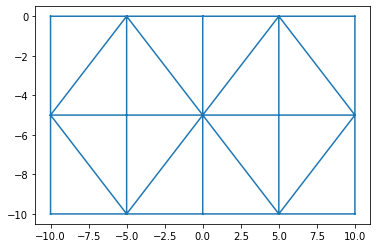

In [4]:
hull_bound_points = np.array([[10,-10],[-10,-10],[10,0],[-10,0]])
mesh_resolution = 5
tri = creatHull(hull_bound_points,mesh_resolution)
plt.triplot(tri.points[:,0], tri.points[:,1], tri.simplices)
plt.show()

Common edge

edgecommon = np.array([[10,0],[-10,0]])

In [5]:
def overlappedPoints(points, edgecommon):
    oPoints = []
    for i in points:
        if (edgecommon[0][0] == edgecommon[1][0]):
            if ((i[0] == edgecommon[0][0]) and ((i[1] - edgecommon[0][1])*(i[1] - edgecommon[1][1])<=0)):
                oPoints.append([i[0],i[1]])
        elif (edgecommon[0][1] == edgecommon[1][1]):
            if((i[1] == edgecommon[0][1]) and ((i[0] - edgecommon[0][0])*(i[0] - edgecommon[1][0])<=0)):
                oPoints.append([i[0],i[1]])
        elif(((i[0] - edgecommon[0][0])/(edgecommon[1][0]-edgecommon[0][0]) - (i[1] - edgecommon[0][1])/(edgecommon[1][1]-edgecommon[0][1])<10e-3) and ((i[1] - edgecommon[0][1])*(i[1] - edgecommon[1][1])<=0)):
            oPoints.append([i[0],i[1]])
    return np.array(oPoints)     

p = overlappedPoints(tri.points, edgecommon)
p

In [6]:
def overlappedPointsPosition(points,points_list):
    olPP = []
    for i in points_list:
        x = (points == i).all(axis=1).nonzero()
        olPP.append(x[0][0])
    return olPP

olPP = overlappedPointsPosition(tri.points,p)
olPP

# Hull extension

In [7]:
def extentHull(tri_origine,hull_bound_points_ext,mesh_resolution_ext,commonEdge):
    
    # find overlapped point on tri_original
    olP = overlappedPoints(tri_origine.points, commonEdge)
    # find the positions of the ovelapped points
    olPP = overlappedPointsPosition(tri_origine.points,olP)
    # creat hull
    hull_bound_ext = Delaunay(hull_bound_points_ext)
    
    mesh_points = []
    for i in range(min(i[0] for i in hull_bound_points_ext),max(i[0] for i in hull_bound_points_ext)+1,mesh_resolution_ext):
        for j in range(min(i[1] for i in hull_bound_points_ext),max(i[1] for i in hull_bound_points_ext)+1,mesh_resolution_ext):
            mesh_points.append([i,j])
    mesh_ini = np.array(mesh_points)
    
    # find the overlapped point on new tri_
    olP2 = overlappedPoints(mesh_ini, commonEdge)
    # find the positions of the new ovelapped points
    olPP2 = overlappedPointsPosition(mesh_ini,olP2)
    # delete these nex overlapped points
    mesh_ini_del = np.delete(mesh_ini, olPP2, 0)
    # add the ovelapped points in the original tri 
    mesh_ini = np.append(olP,mesh_ini_del, axis=0)
    # check if inside hull
    mesh_add = np.array([p_ for p_ in mesh_ini if hull_bound_ext.find_simplex(p_)>=0])
    # the extended tri
    tri_ext = Delaunay(mesh_add)
    
    # points in the merged tri
    tri_final_points = np.concatenate((tri_origine.points, mesh_ini_del), axis=0)
    
    tri_ext_simplices = tri_ext.simplices + tri_origine.points.shape[0] - len(olPP)
    for i in range(len(olPP)):
        pos = np.where(tri_ext_simplices == (i + tri_origine.points.shape[0] - len(olPP)))
        for j in range(len(pos[0])):
            tri_ext_simplices[pos[0][j]][pos[1][j]] = olPP[i]
            
    tri_final_simplices = np.concatenate((tri_origine.simplices, tri_ext_simplices), axis=0)
    
    return Delaunay_temp(tri_final_points,tri_final_simplices)

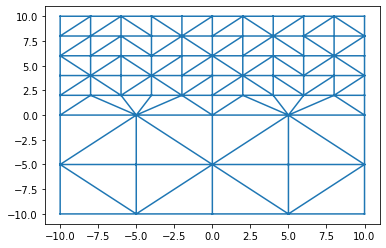

In [8]:
hull_bound_points_ext = np.array([[10,10],[-10,10],[10,0],[-10,0]])
mesh_resolution_ext = 2
commonEdge = np.array([[10,0],[-10,0]])
tri_final = extentHull(tri,hull_bound_points_ext,mesh_resolution_ext,commonEdge)
# plot
plt.triplot(tri_final.points[:,0], tri_final.points[:,1], tri_final.simplices)
plt.show()

# Add small strip-line

In [9]:
hull_bound_points_ext = np.array([[-10,20],[-8,20],[-10,10],[-8,10]])
mesh_resolution_ext = 1
commonEdge = np.array([[-10,10],[-8,10]])

tri_final = extentHull(tri_final,hull_bound_points_ext,mesh_resolution_ext,commonEdge)

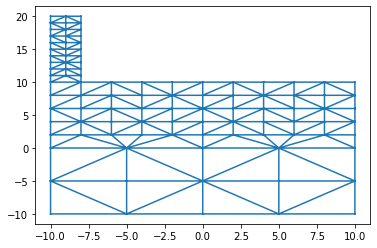

In [10]:
# plot
plt.triplot(tri_final.points[:,0], tri_final.points[:,1], tri_final.simplices)
plt.show()

# Add small strip-line 

In [11]:
hull_bound_points_ext = np.array([[-8,20],[10,20],[-8,18],[10,18]])
mesh_resolution_ext = 1
commonEdge = np.array([[-8,18],[-8,20]])

tri_final = extentHull(tri_final,hull_bound_points_ext,mesh_resolution_ext,commonEdge)

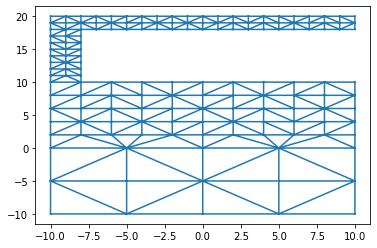

In [12]:
# plot
plt.triplot(tri_final.points[:,0], tri_final.points[:,1], tri_final.simplices)
plt.show()